In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix

In [ ]:
import plotly.graph_objects as go
def display_training_curves(training, validation, yaxis):
    ylabel = "{}".format(yaxis)
    title = "{} vs. Epochs".format(yaxis)

    fig = go.Figure()

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs+1), mode='lines+markers', y=training, marker=dict(color="dodgerblue"),
               name="Train"))

    fig.add_trace(
        go.Scatter(x=np.arange(1, epochs+1), mode='lines+markers', y=validation, marker=dict(color="darkorange"),
               name="Val"))

    fig.update_layout(title_text=title, yaxis_title=ylabel, xaxis_title="Epochs", template="plotly_white")
    fig.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
main_folder = "/content/drive/MyDrive/BananaLSD/AugmentedSet"
main_folder = "/content/drive/MyDrive/BananaLSD/OriginalSet"

In [ ]:
train_ratio = 0.8  # 80% for training, 20% for testing

train_files = {}
test_files = {}

random.seed(42)

In [ ]:
# Iterate over the class folders
for class_folder in os.listdir(main_folder):
    class_path = os.path.join(main_folder, class_folder)
    images = os.listdir(class_path) #A list containing images names for each class

    # Shuffle the images randomly
    random.seed(42)
    random.shuffle(images)

    # Determine the split index based on the train ratio
    split_index = int(len(images) * train_ratio)

    # Assign images to train and test dictionaries
    train_files[class_folder] = images[:split_index] #Dictionary containing className: List of images
    test_files[class_folder] = images[split_index:]

In [ ]:
# Define image dimensions and number of classes
image_width, image_height = 224, 224
num_classes = len(train_files)
print(num_classes)

4


In [ ]:
# Create empty arrays to store the image data and labels
train_data = []
train_labels = []
test_data = []
test_labels = []

# Load and preprocess train set images
for class_folder, images in train_files.items():
    for image in images:
        image_path = os.path.join(main_folder, class_folder, image)
        img = load_img(image_path, target_size=(image_width, image_height))
        img_array = img_to_array(img)
        train_data.append(img_array)
        train_labels.append(class_folder)

# Load and preprocess test set images
for class_folder, images in test_files.items():
    for image in images:
        image_path = os.path.join(main_folder, class_folder, image)
        img = load_img(image_path, target_size=(image_width, image_height))
        img_array = img_to_array(img)
        test_data.append(img_array)
        test_labels.append(class_folder)

# Convert the data and labels to NumPy arrays
train_data = np.array(train_data)
test_data = np.array(test_data)


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.10/dist-packages/PIL/JpegImagePlugin.py:835: UserWarning: Image appears to be a malformed MPO file, it will be interpreted as a base JPEG file
  warnings.warn(


In [ ]:
# Create a dictionary to map class folder names to integer labels
class_label_map = {class_folder: i for i, class_folder in enumerate(train_files.keys())}

# Convert the train and test labels to integer labels
train_labels = np.array([class_label_map[label] for label in train_labels])
test_labels = np.array([class_label_map[label] for label in test_labels])


# Convert class labels to one-hot encoding
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

In [ ]:
from tensorflow.keras.applications import ResNet50, MobileNetV3Large, MobileNetV3Small
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(image_width, image_height, 3))

# Freeze the pre-trained layers so they are not updated during training
for layer in resnet.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
model = tf.keras.backend.clear_session()
# Create a new model by adding the ResNet model on top of your existing layers
model = Sequential()
model.add(resnet)
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 10

history = model.fit(train_data, train_labels, batch_size=batch_size, epochs=epochs, validation_data=(test_data, test_labels))


display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy')

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss')

display_training_curves(
    history.history['f1_m'],
    history.history['val_f1_m'],
    'f1_score')

display_training_curves(
    history.history['precision_m'],
    history.history['val_precision_m'],
    'precision')

display_training_curves(
    history.history['recall_m'],
    history.history['val_recall_m'],
    'recall')

Epoch 1/25
24/24 [==============================] - 250s 10s/step - loss: 2.8249 - accuracy: 0.7801 - val_loss: 0.9310 - val_accuracy: 0.9275
Epoch 2/25
24/24 [==============================] - 202s 9s/step - loss: 0.1434 - accuracy: 0.9699 - val_loss: 0.5336 - val_accuracy: 0.9741
Epoch 3/25
24/24 [==============================] - 242s 10s/step - loss: 0.0369 - accuracy: 0.9908 - val_loss: 0.6126 - val_accuracy: 0.9793
Epoch 4/25
24/24 [==============================] - 201s 8s/step - loss: 0.0233 - accuracy: 0.9974 - val_loss: 0.6507 - val_accuracy: 0.9793
Epoch 5/25
24/24 [==============================] - 200s 8s/step - loss: 0.0142 - accuracy: 0.9974 - val_loss: 0.6386 - val_accuracy: 0.9793
Epoch 6/25
24/24 [==============================] - 200s 8s/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.6418 - val_accuracy: 0.9793
Epoch 7/25
24/24 [==============================] - 198s 8s/step - loss: 0.0040 - accuracy: 0.9974 - val_loss: 0.6445 - val_accuracy: 0.9793
Epoch 8/25


KeyError: 'f1_m'

In [ ]:
 # Evaluate the model
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

7/7 [==============================] - 38s 5s/step - loss: 0.7573 - accuracy: 0.9378
Test Loss: 0.7572904825210571
Test Accuracy: 0.9378238320350647


In [ ]:
# Evaluate the model and get the predicted labels
predictions = model.predict(test_data)
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels
true_labels = np.argmax(test_labels, axis=1)

# Compute the confusion matrix
confusion = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# Convert the confusion matrix to a NumPy array
confusion = confusion.numpy()

7/7 [==============================] - 45s 5s/step


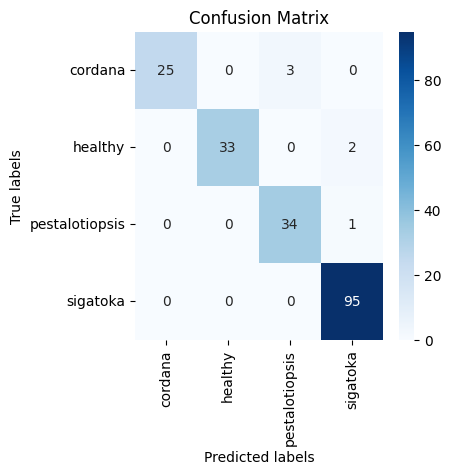

In [ ]:
# Display the confusion matrix
plt.figure(figsize=(num_classes, num_classes))
ax = sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")
# Modify the labels
new_x_labels = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']
new_y_labels = ['cordana', 'healthy', 'pestalotiopsis', 'sigatoka']
# Set the modified labels
ax.set_xticklabels(new_x_labels, rotation=90)
ax.set_yticklabels(new_y_labels, rotation=0)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Save the trained model
model.save('banana_leaf_disease_model.h5')

NameError: name 'model' is not defined

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

def predict_image_class(image_path, model):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions)

    return predicted_class

model = tf.keras.models.load_model('banana_leaf_disease_model.h5')

image_path = '/content/drive/MyDrive/BananaLSD/OriginalSet/sigatoka/0.jpeg'

#predicted class
predicted_class = predict_image_class(image_path, model)

# Map the predicted class index to class name
class_names = list(train_files.keys())
predicted_class_name = class_names[predicted_class]

print("Predicted Class Name:", predicted_class_name)

NameError: name 'tf' is not defined